# Imports

In [55]:
import pandas as pd
import numpy as np
import optuna
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score
import pickle

sys.path.append(os.path.abspath('../'))
# plt.style.use('dark_background')

In [2]:
import xgboost as xgb
print(xgb.__version__)

try:
    xgb.XGBClassifier(tree_method="gpu_hist")
    print("GPU ok")
except Exception as e:
    print(e)

optuna.logging.set_verbosity(optuna.logging.WARNING)

2.1.4
GPU ok


In [3]:
dataset_path = os.path.abspath(
    '../data/high_popularity_spotify_data.csv')  # Caminho relativo


df_high = pd.read_csv(dataset_path, decimal='.')


df_high

energy    tempo  danceability playlist_genre  loudness  liveness  \
0      0.592  157.969         0.521            pop    -7.777    0.1220   
1      0.507  104.978         0.747            pop   -10.171    0.1170   
2      0.808  108.548         0.554            pop    -4.169    0.1590   
3      0.910  112.966         0.670            pop    -4.070    0.3040   
4      0.783  149.027         0.777            pop    -4.477    0.3550   
...      ...      ...           ...            ...       ...       ...   
1681   0.422  124.357         0.573          latin    -7.621    0.1020   
1682   0.725  105.016         0.711          latin    -8.315    0.1100   
1683   0.809   99.005         0.724          latin    -5.022    0.0765   
1684   0.642   83.389         0.463          latin    -4.474    0.0686   
1685   0.890  126.881         0.645            pop    -4.985    0.3760   

      valence               track_artist  time_signature  speechiness  ...  \
0       0.535      Lady Gaga, Bruno Mars               3       0.0304  ...   
1       0.438              Billie Eilish               4       0.0358  ...   
2       0.372              Gracie Abrams               4       0.0368  ...   
3       0.786          Sabrina Carpenter               4       0.0634  ...   
4       0.939           ROSÉ, Bruno Mars               4       0.2600  ...   
...       ...                        ...             ...          ...  ...   
1681    0.693                   Libianca               5       0.0678  ...   
1682    0.530                   Omah Lay               4       0.0941  ...   
1683    0.606               Davido, FAVE               4       0.0929  ...   
1684    0.339        Future, Drake, Tems               4       0.3400  ...   
1685    0.421  Alan Walker, Ina Wroldsen               4       0.1280  ...   

      instrumentalness          track_album_id mode key duration_ms  \
0             0.000000  10FLjwfpbxLmW8c25Xyc2N    0   6      251668   
1             0.060800  7aJuG4TFXa2hmE4z1yxc3n    1   2      210373   
2             0.000000  0hBRqPYPXhr1RkTDG3n4Mk    1   1      166300   
3             0.000000  4B4Elma4nNDUyl6D5PvQkj    0   0      157280   
4             0.000000  2IYQwwgxgOIn7t3iF6ufFD    0   0      169917   
...                ...                     ...  ...  ..         ...   
1681          0.000013  5Hmh6N8oisrcuZKa8EY5dn    0  10      184791   
1682          0.129000  5NLjxx8nRy9ooUmgpOvfem    0   3      183057   
1683          0.000000  6lI21W76LD0S3vC55GrfSS    0   6      194040   
1684          0.000000  6tE9Dnp2zInFij4jKssysL    1   1      189893   
1685          0.000009  34yBJhr8zlBAHMEMSwrISN    1   6      205087   

     acousticness                      id playlist_subgenre            type  \
0          0.3080  2plbrEY59IikOBgBGLjaoe        mainstream  audio_features   
1          0.2000  6dOtVTDdiauQNBQEDOtlAB        mainstream  audio_features   
2          0.2140  7ne4VBA60CxGM75vw0EYad        mainstream  audio_features   
3          0.0939  1d7Ptw3qYcfpdLNL5REhtJ        mainstream  audio_features   
4          0.0283  5vNRhkKd0yEAg8suGBpjeY        mainstream  audio_features   
...           ...                     ...               ...             ...   
1681       0.5510  26b3oVLrRUaaybJulow9kz        afro-latin  audio_features   
1682       0.4240  1wADwLSkYhrSmy4vdy6BRn        afro-latin  audio_features   
1683       0.1820  7vKXc90NT5WBm3UTT4iTVG        afro-latin  audio_features   
1684       0.3140  59nOXPmaKlBfGMDeOVGrIK        afro-latin  audio_features   
1685       0.2590  2GE3k8I0Sbh0puCjI15KGy            scandi  audio_features   

                 playlist_id  
0     37i9dQZF1DXcBWIGoYBM5M  
1     37i9dQZF1DXcBWIGoYBM5M  
2     37i9dQZF1DXcBWIGoYBM5M  
3     37i9dQZF1DXcBWIGoYBM5M  
4     37i9dQZF1DXcBWIGoYBM5M  
...                      ...  
1681  0oU30cCr8klmMsuOKHDLkh  
1682  0oU30cCr8klmMsuOKHDLkh  
1683  0oU30cCr8klmMsuOKHDLkh  
1684  0oU30cCr8klmMsuOKHDLkh  
1685  59z06GgF6TTDbm5cr1RZUC  

[1686

In [4]:
dataset_path = os.path.abspath(
    '../data/low_popularity_spotify_data.csv')  # Caminho relativo


df_low = pd.read_csv(dataset_path, decimal='.')


df_low

time_signature  track_popularity  speechiness  danceability  \
0                4.0                23       0.0393         0.636   
1                4.0                53       0.0317         0.572   
2                4.0                55       0.0454         0.591   
3                4.0                64       0.1010         0.443   
4                4.0                62       0.0298         0.685   
...              ...               ...          ...           ...   
3140             1.0                33       0.0634         0.352   
3141             4.0                22       0.0656         0.471   
3142             4.0                18       0.0671         0.436   
3143             1.0                23       0.0813         0.489   
3144             4.0                14       0.0598         0.270   

          playlist_name                                       track_artist  \
0         Rock Classics                       Creedence Clearwater Revival   
1         Rock Classics                                          Van Halen   
2         Rock Classics                                       Stevie Nicks   
3         Jazz Classics                   Ella Fitzgerald, Louis Armstrong   
4         Jazz Classics                                     Galt MacDermot   
...                 ...                                                ...   
3140  Carnatic Classics                                 M. S. Subbulakshmi   
3141  Carnatic Classics                                  Jayanthi Kumaresh   
3142  Carnatic Classics  Nirmala Rajasekar, Raghavendra Rao, Tanjore K....   
3143  Carnatic Classics                                  Ganesh & Kumaresh   
3144  Carnatic Classics                                   Sudha Ragunathan   

      duration_ms  energy playlist_genre playlist_subgenre  ...  \
0        138053.0   0.746           rock           classic  ...   
1        241600.0   0.835           rock           classic  ...   
2        329413.0   0.804           rock           classic  ...   
3        185160.0   0.104           jazz           classic  ...   
4        205720.0   0.472           jazz           classic  ...   
...           ...     ...            ...               ...  ...   
3140     661293.0   0.424         indian         classical  ...   
3141     394400.0   0.349         indian         classical  ...   
3142     473440.0   0.595         indian         classical  ...   
3143     298987.0   0.591         indian         classical  ...   
3144     645701.0   0.816         indian         classical  ...   

              track_album_id             playlist_id                track_id  \
0     4A8gFwqd9jTtnsNwUu3OQx  37i9dQZF1DWXRqgorJj26U  5e6x5YRnMJIKvYpZxLqdpH   
1     2c965LEDRNrXXCeBOAAwns  37i9dQZF1DWXRqgorJj26U  5FqYA8KfiwsQvyBI4IamnY   
2     3S404OgKoVQSJ3xXrDVlp8  37i9dQZF1DWXRqgorJj26U  5LNiqEqpDc8TuqPy79kDBu   
3     1y5KGkUKO0NG32MhIIagCA  37i9dQZF1DXbITWG1ZJKYt  78MI7mu1LV1k4IA2HzKmHe   
4     6f4b9wVTkKAf096k4XG6x5  37i9dQZF1DXbITWG1ZJKYt  6MN6yRVriszuyAVlyF8ndB   
...                      ...                     ...                     ...   
3140  5utDQUWCZCEXWHMmna8C63  3sIB6VOssssCO17VUPu80m  1IkR0OgVI1gydC4S6jnG2B   
3141  4kUGwkHXKBbaLwnqTIrg0J  3sIB6VOssssCO17VUPu80m  4ZFM5yFsjEzvZ1XmP27L5r   
3142  6FMROVG9PB4nJYmvNLTdge  3sIB6VOssssCO17VUPu80m  5wZQXUcphAyBZfVdWmAiYX   
3143  3si4Lr5oBcahJ3D7IPbO4N  3sIB6VOssssCO17VUPu80m  5Ca5l5vDzIOZdVwwWCxAds   
3144  2tezom8oCCpSeiriOFeZNi  3sIB6VOssssCO17VUPu80m  0HmenrANrrNVi8244GsYB5   

     valence   key    tempo loudness acousticness  liveness  \
0      0.432   0.0  132.310   -3.785       0.0648    0.1730   
1      0.795   0.0  129.981   -6.219       0.1710    0.0702   
2      0.658   0.0  111.457   -7.299       0.3270    0.0818   
3      0.394   0.0   76.474  -17.042       0.9130    0.1910   
4      0.475   9.0   80.487   -9.691       0.7850    0.2240   
...      ...   ...      ...      ...          ...       ...   
3140   0.605  10.0   75.466   -8.

In [5]:
df_low = df_low.drop(columns=['track_popularity'])
df_low['popularity_class'] = 0

df_high = df_high.drop(columns=['track_popularity'])
df_high['popularity_class'] = 1

df_origin = pd.concat([df_high, df_low]).reset_index(drop=True)
df_origin.shape

(4831, 29)

# Ajuste dos Atributos

In [6]:
df_origin = df_origin.dropna()
df_origin = df_origin.drop(columns=['track_href', 'uri', 'analysis_url',
                           'track_id', 'track_album_id', 'id', 'type', 'playlist_id'], errors='ignore')

df_origin.shape

(4829, 21)

In [7]:
def parse_date(date_str):
    for fmt in ['%Y-%m-%d', '%Y', '%Y-%m']:
        try:
            return pd.to_datetime(date_str, format=fmt).year
        except ValueError:
            pass
    return pd.NaT


df_origin['year'] = df_origin['track_album_release_date'].apply(parse_date)

In [8]:
df_origin['number_of_artists'] = df_origin['track_artist'].str.split(
    ',').str.len()

In [9]:
nunique_df = df_origin.nunique().reset_index()
nunique_df.columns = ['column_name', 'nunique']
nunique_df

column_name  nunique
0                     energy     1119
1                      tempo     4080
2               danceability      820
3             playlist_genre       35
4                   loudness     3770
5                   liveness      980
6                    valence     1133
7               track_artist     3388
8             time_signature        4
9                speechiness     1039
10          track_album_name     3815
11             playlist_name      116
12                track_name     4371
13  track_album_release_date     1845
14          instrumentalness     1895
15                      mode        2
16                       key       12
17               duration_ms     4147
18              acousticness     1853
19         playlist_subgenre       84
20          popularity_class        2
21                      year       64
22         number_of_artists       10

In [10]:
df_origin = pd.get_dummies(
    df_origin, columns=['key', 'time_signature'], drop_first=False, dtype=int)


df_origin.shape

(4829, 37)

In [11]:
df = df_origin.select_dtypes(include=np.number)

last_year = 2024
df['song_age'] = last_year - df['year']
df = df.drop('year', axis=1)

In [12]:
df.columns

Index(['energy', 'tempo', 'danceability', 'loudness', 'liveness', 'valence',
       'speechiness', 'instrumentalness', 'mode', 'duration_ms',
       'acousticness', 'popularity_class', 'number_of_artists', 'key_0.0',
       'key_1.0', 'key_2.0', 'key_3.0', 'key_4.0', 'key_5.0', 'key_6.0',
       'key_7.0', 'key_8.0', 'key_9.0', 'key_10.0', 'key_11.0',
       'time_signature_1.0', 'time_signature_3.0', 'time_signature_4.0',
       'time_signature_5.0', 'song_age'],
      dtype='object')

# Gráficos

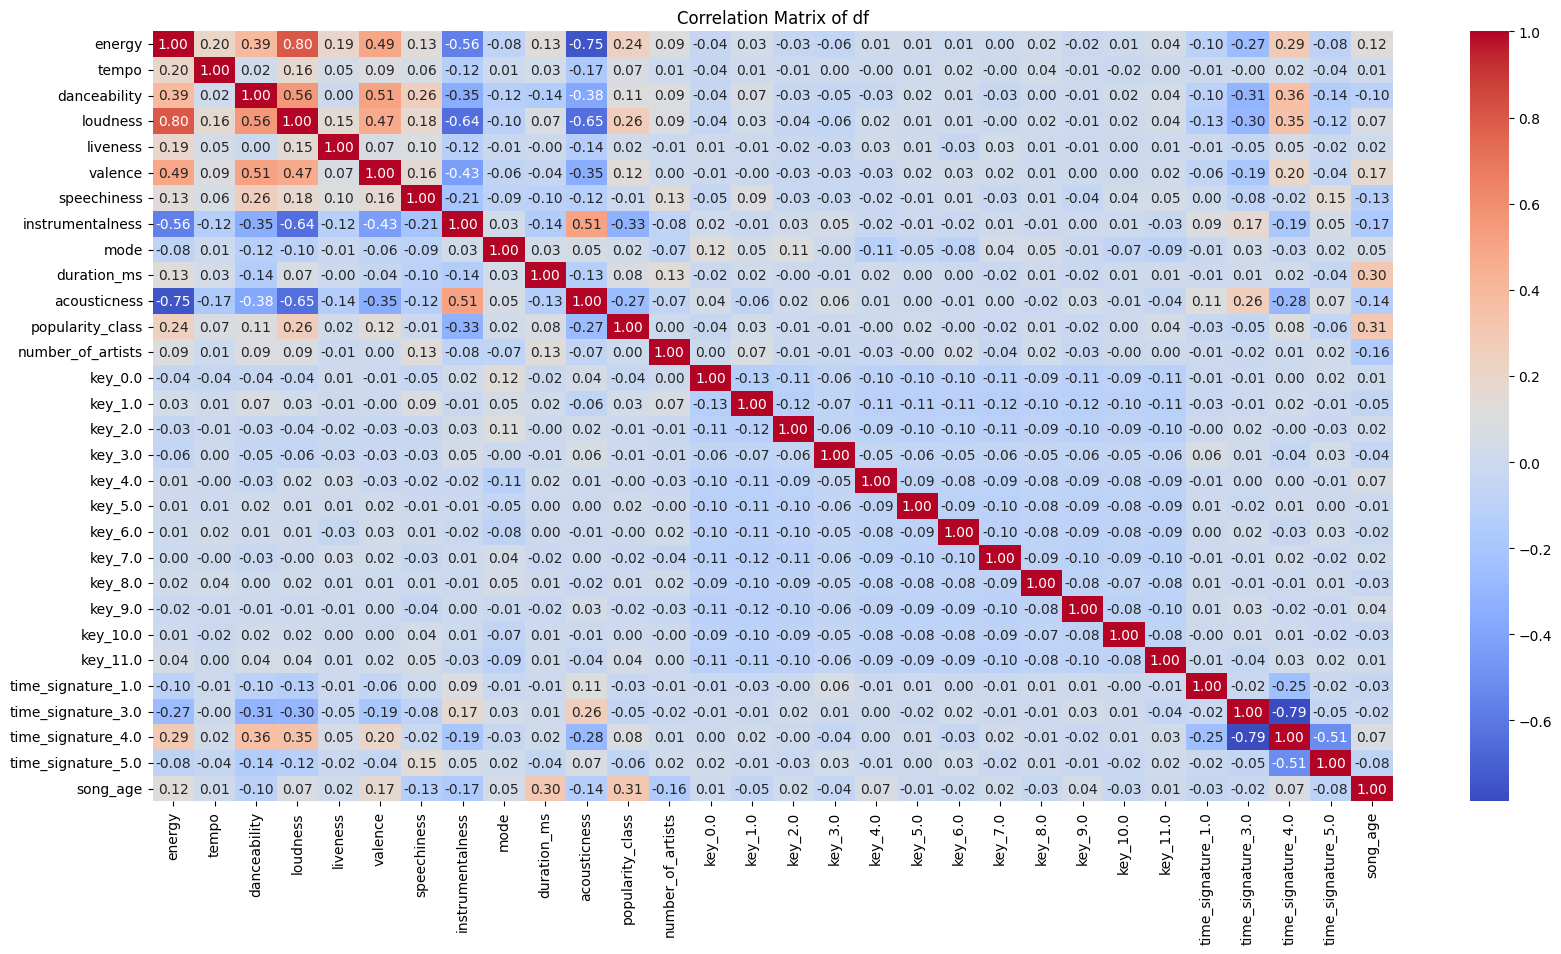

In [13]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of df")
plt.show()

In [14]:
df.columns

Index(['energy', 'tempo', 'danceability', 'loudness', 'liveness', 'valence',
       'speechiness', 'instrumentalness', 'mode', 'duration_ms',
       'acousticness', 'popularity_class', 'number_of_artists', 'key_0.0',
       'key_1.0', 'key_2.0', 'key_3.0', 'key_4.0', 'key_5.0', 'key_6.0',
       'key_7.0', 'key_8.0', 'key_9.0', 'key_10.0', 'key_11.0',
       'time_signature_1.0', 'time_signature_3.0', 'time_signature_4.0',
       'time_signature_5.0', 'song_age'],
      dtype='object')

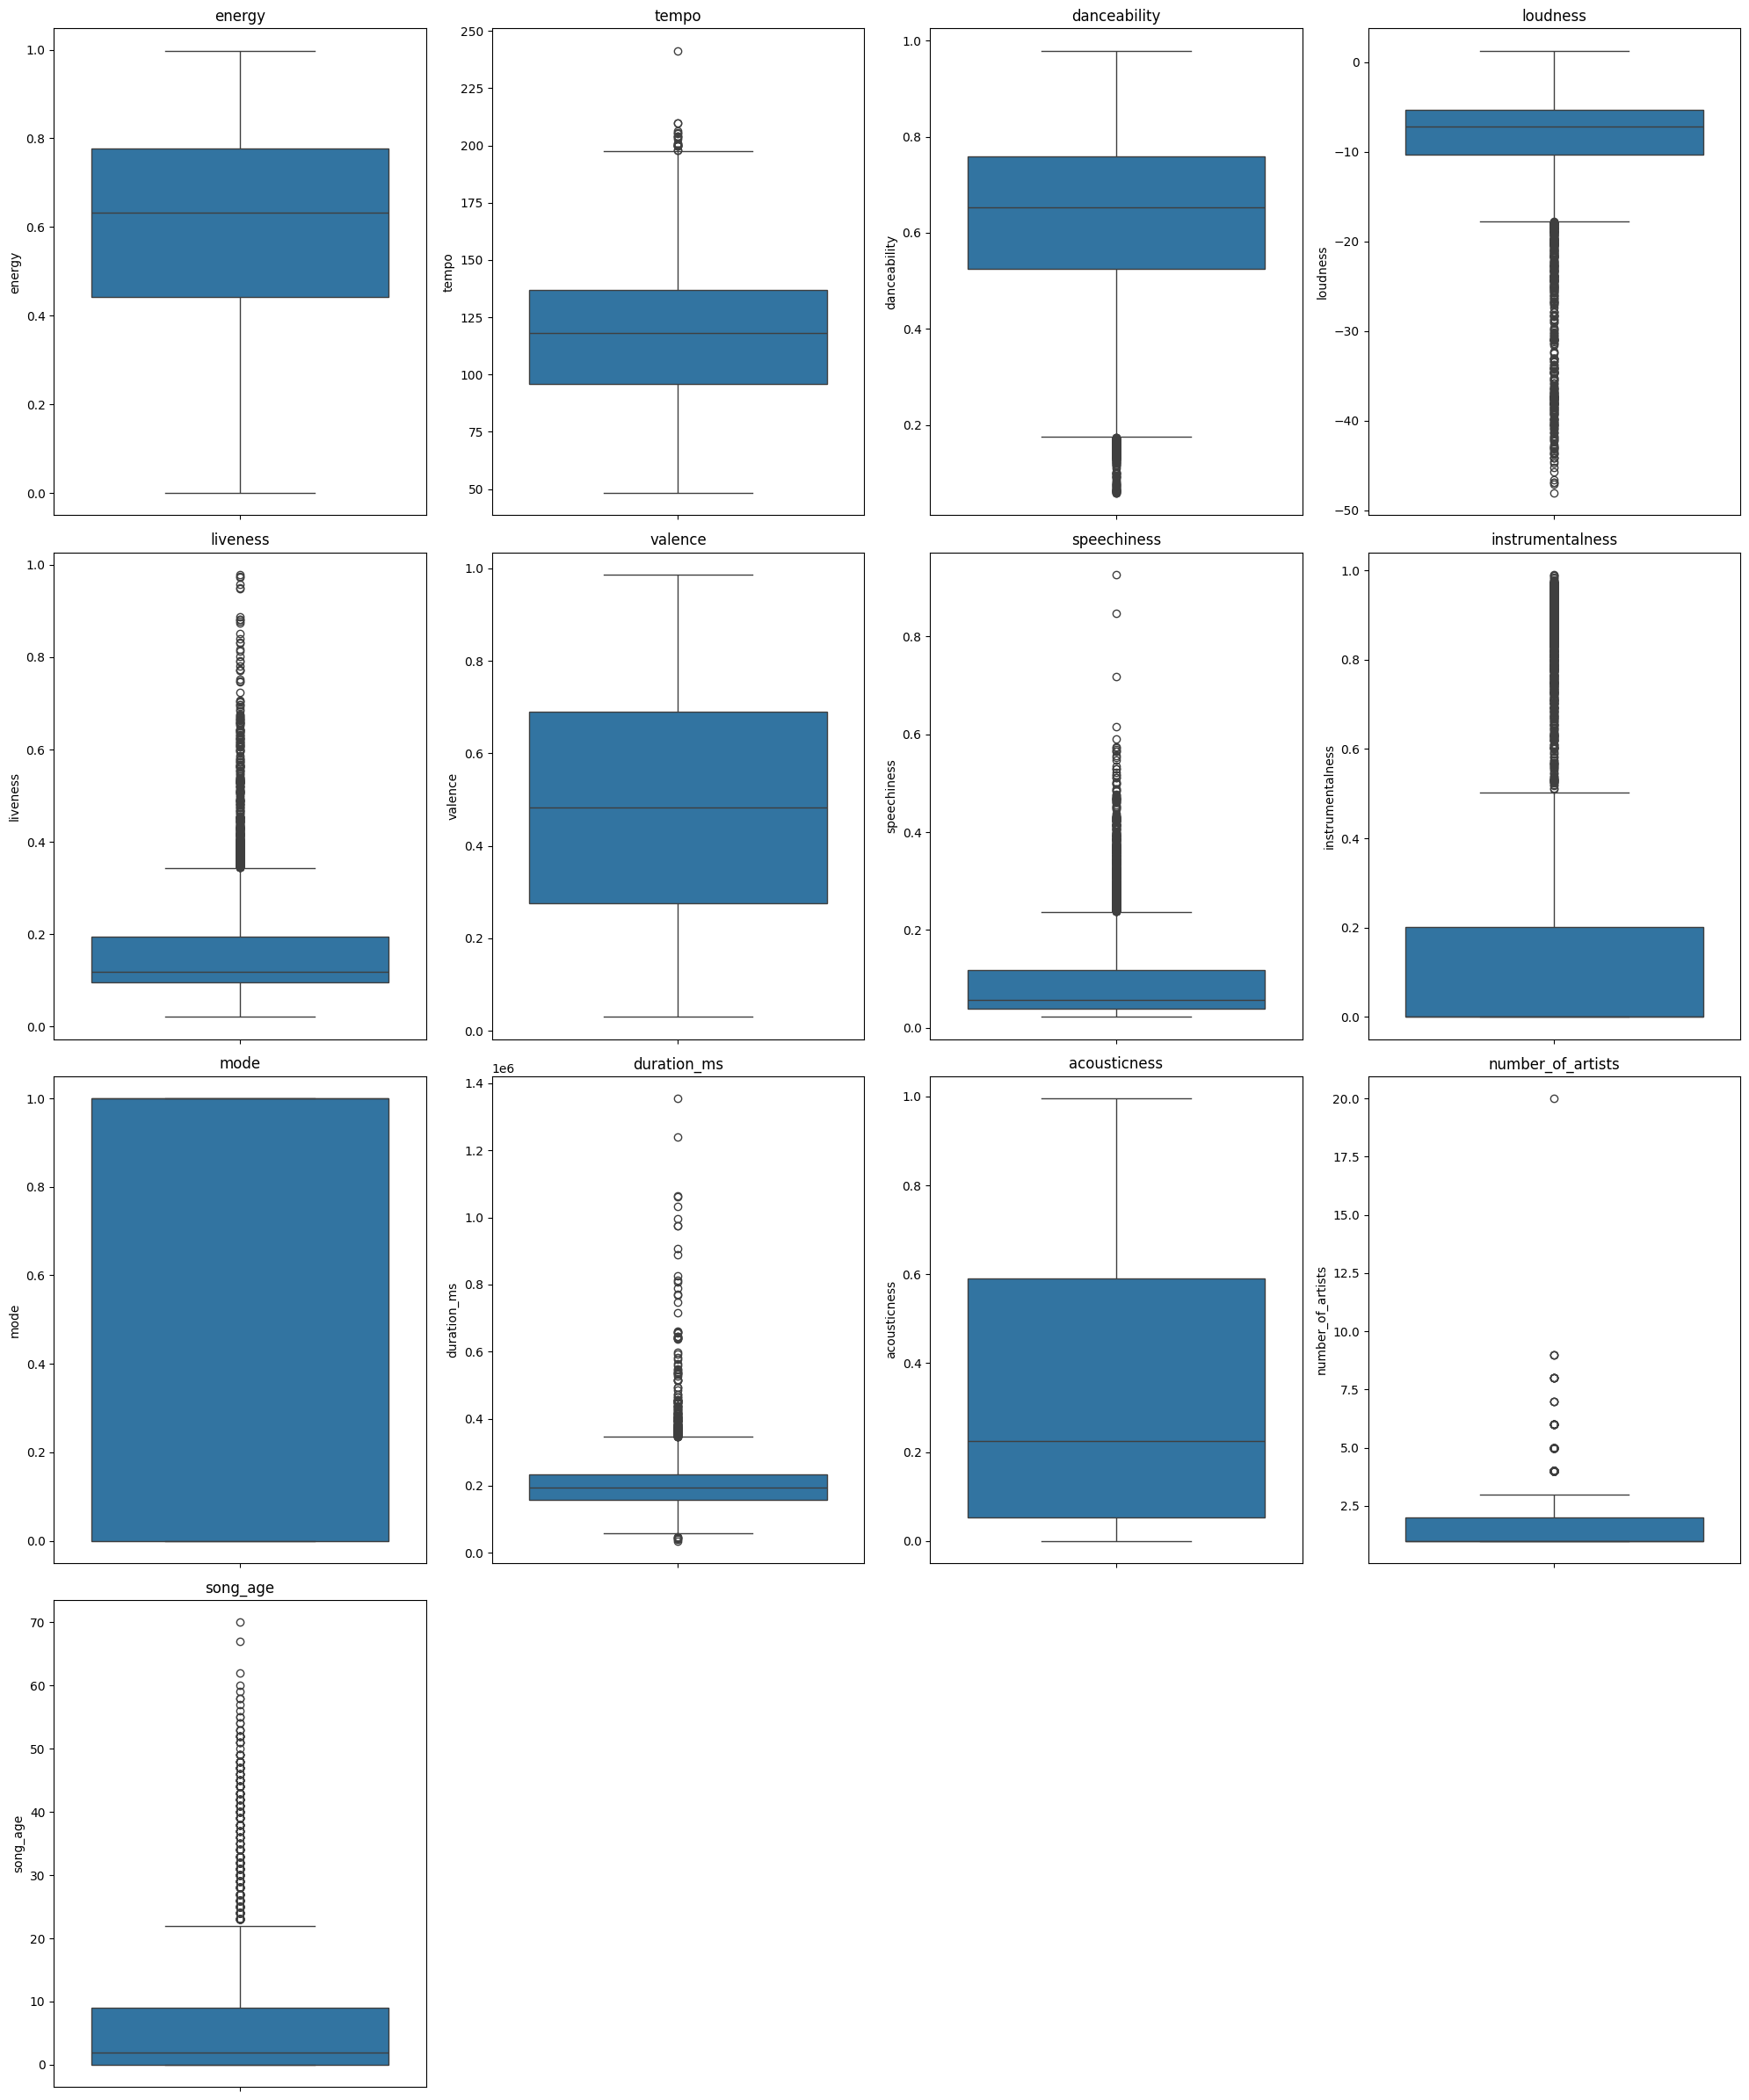

In [15]:
cols = ['energy', 'tempo', 'danceability', 'loudness', 'liveness', 'valence', 'speechiness',
        'instrumentalness', 'mode', 'duration_ms', 'acousticness', 'number_of_artists', 'song_age']

num_plots = len(cols)

ncols = 4
nrows = np.ceil(num_plots / ncols).astype(int)

plt.figure(figsize=(20, nrows * 6))
for i, col in enumerate(cols, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(data=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

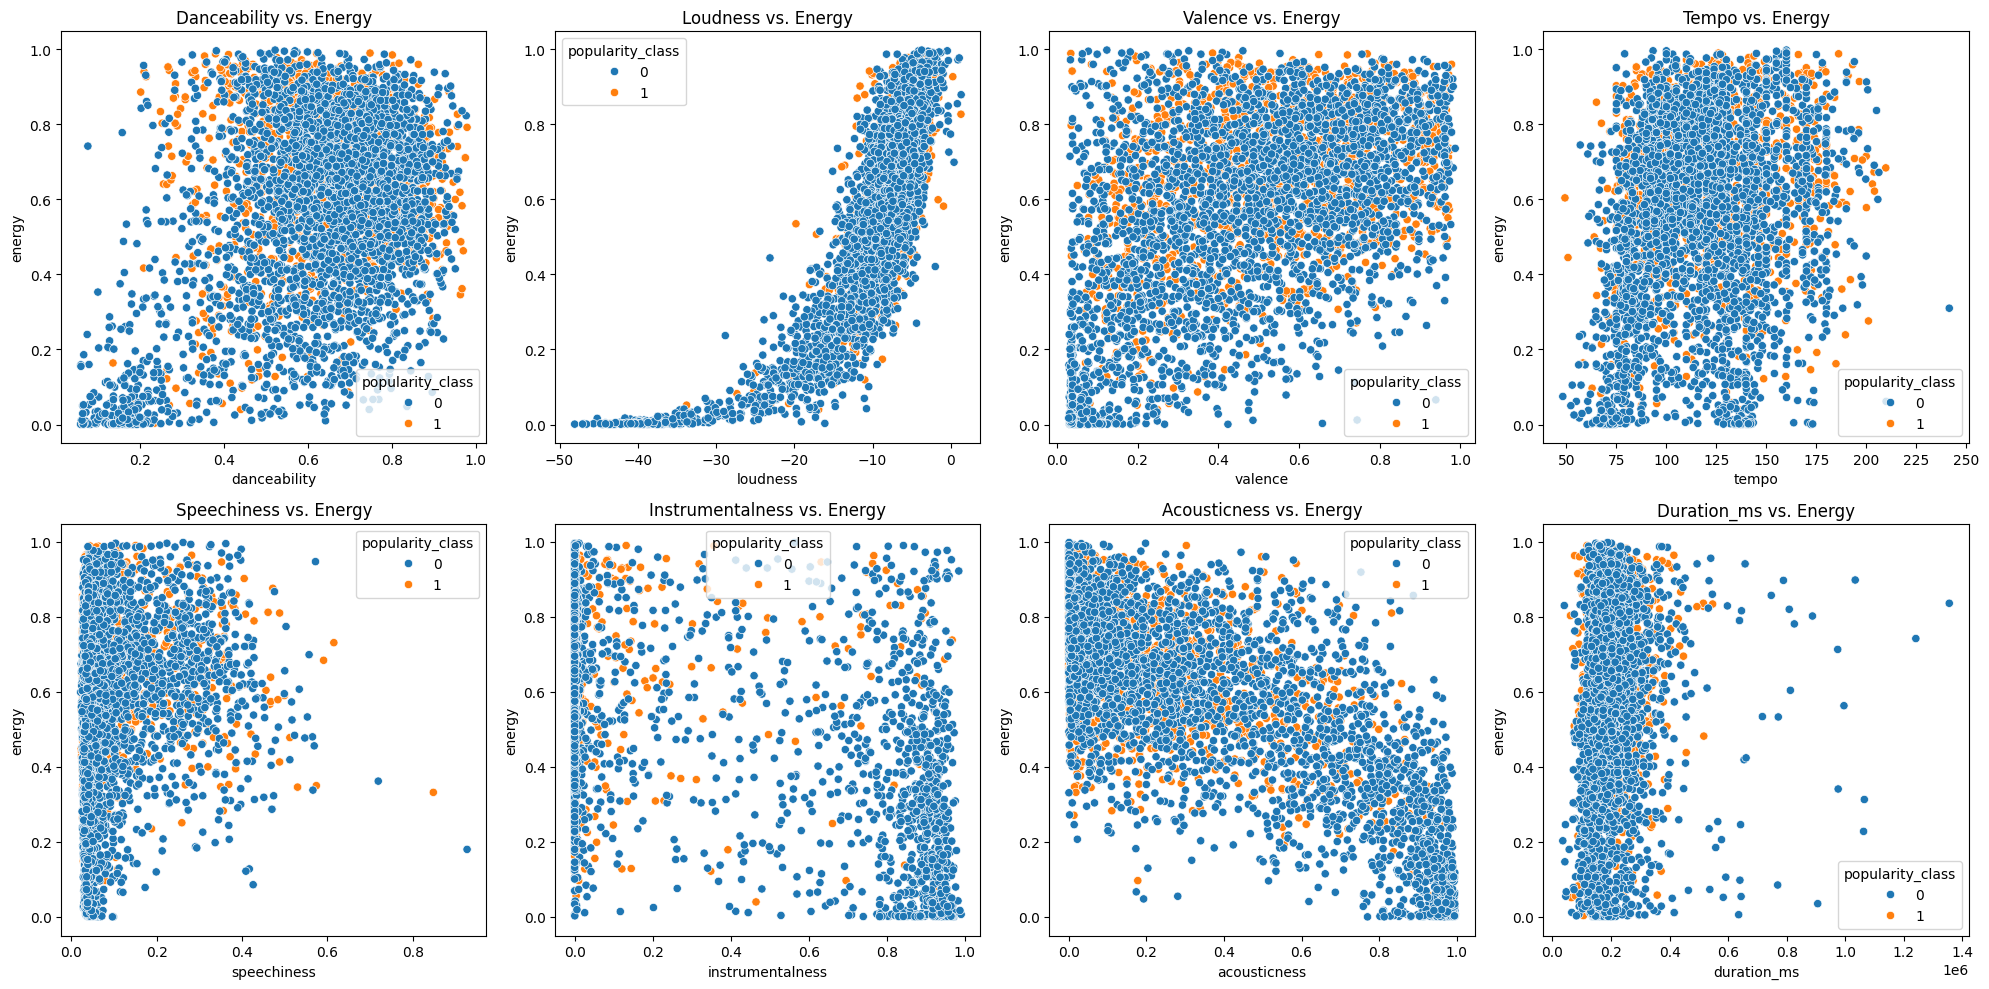

In [16]:
features_to_plot = ['danceability', 'loudness', 'valence', 'tempo',
                    'speechiness', 'instrumentalness', 'acousticness', 'duration_ms']



fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()


for i, feature in enumerate(features_to_plot):


    sns.scatterplot(data=df, x=feature, y='energy',
                    hue='popularity_class', ax=axes[i])


    axes[i].set_title(f'{feature.capitalize()} vs. Energy')


plt.tight_layout()


plt.show()

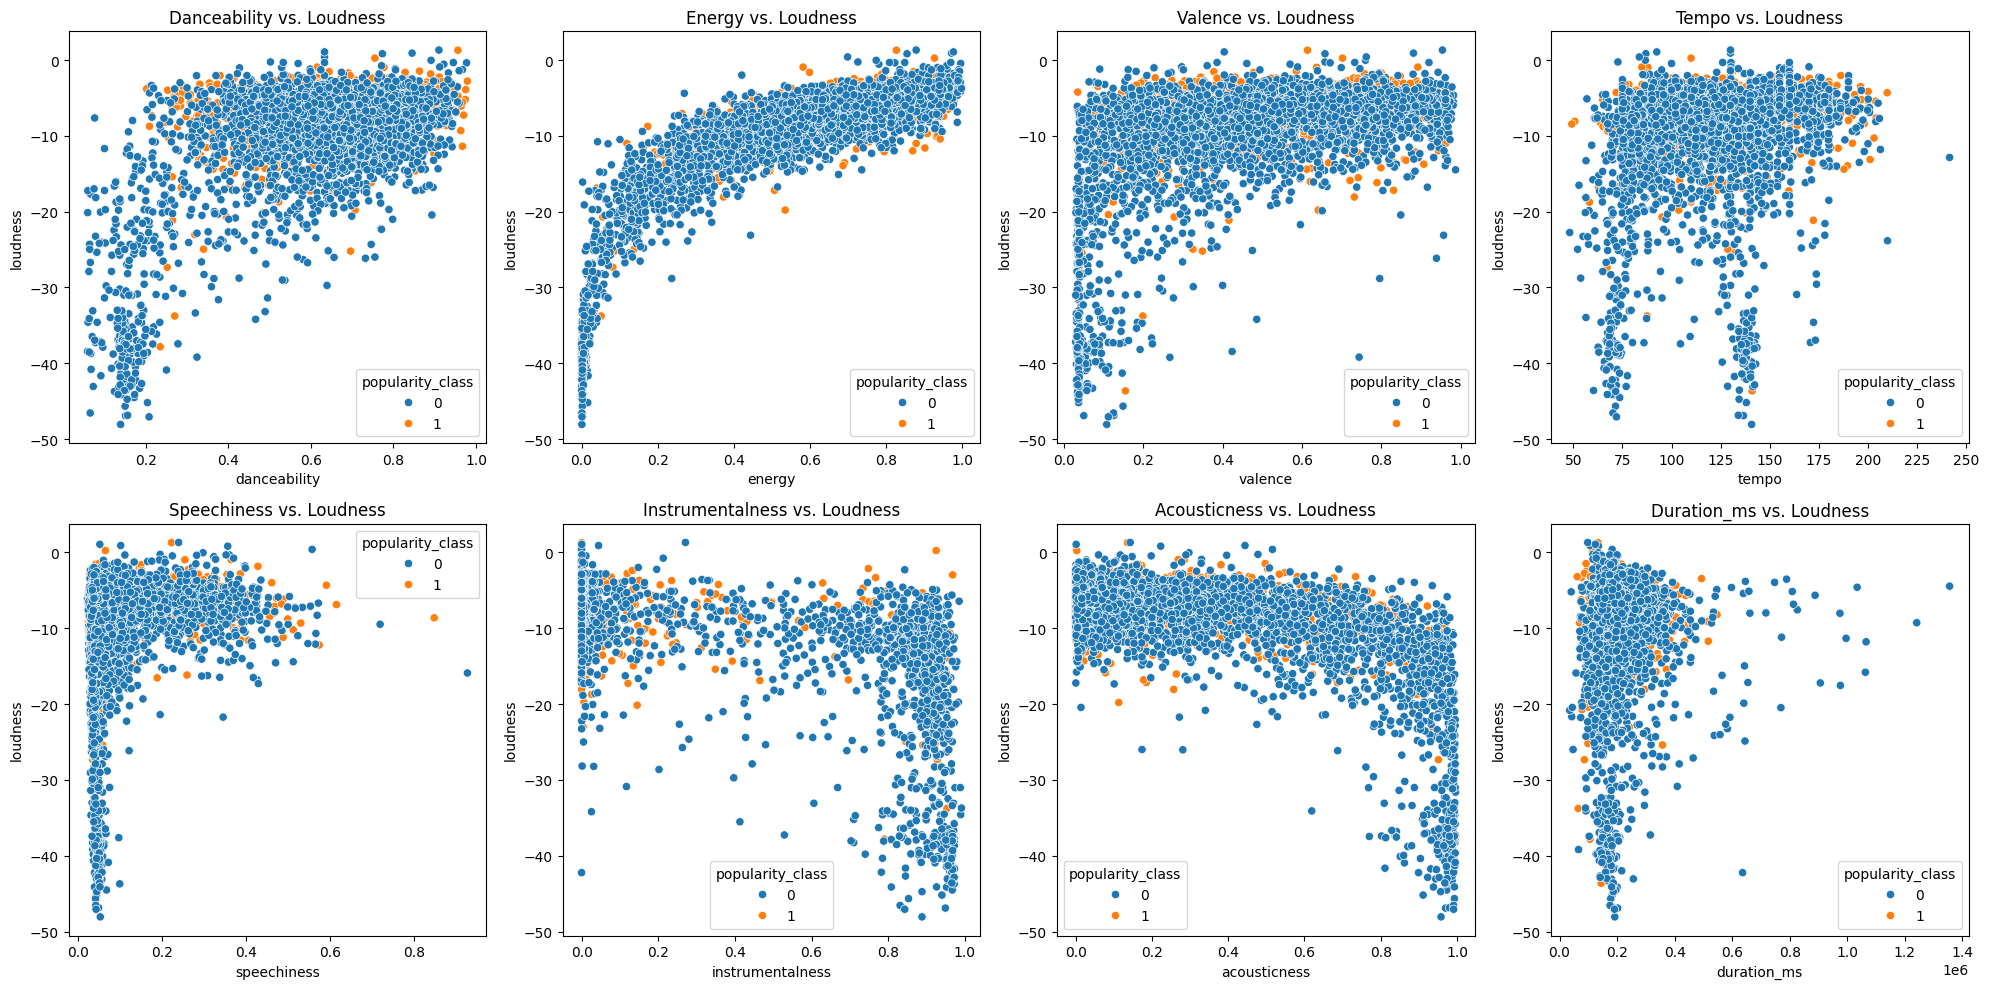

In [17]:
features_to_plot = ['danceability', 'energy', 'valence', 'tempo',
                    'speechiness', 'instrumentalness', 'acousticness', 'duration_ms']



fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()


for i, feature in enumerate(features_to_plot):


    sns.scatterplot(data=df, x=feature, y='loudness',
                    hue='popularity_class', ax=axes[i])


    axes[i].set_title(f'{feature.capitalize()} vs. Loudness')


plt.tight_layout()


plt.show()

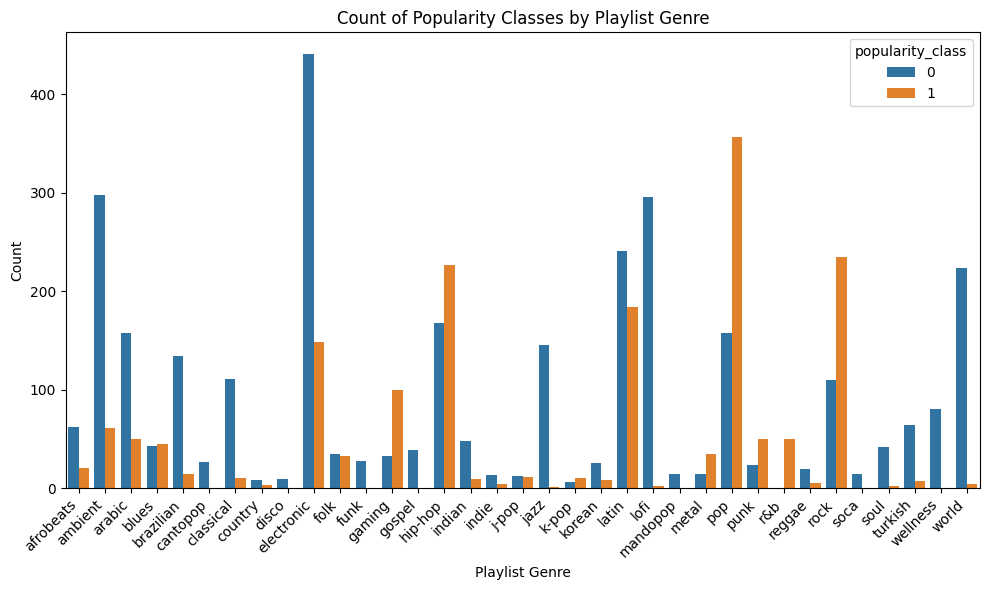

In [18]:
genre_counts = df_origin.groupby(['playlist_genre', 'popularity_class'])[
    'popularity_class'].count().reset_index(name='count')



plt.figure(figsize=(10, 6))


sns.barplot(x='playlist_genre', y='count',
            hue='popularity_class', data=genre_counts)


plt.title('Count of Popularity Classes by Playlist Genre')


plt.xlabel('Playlist Genre')


plt.ylabel('Count')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()


plt.show()

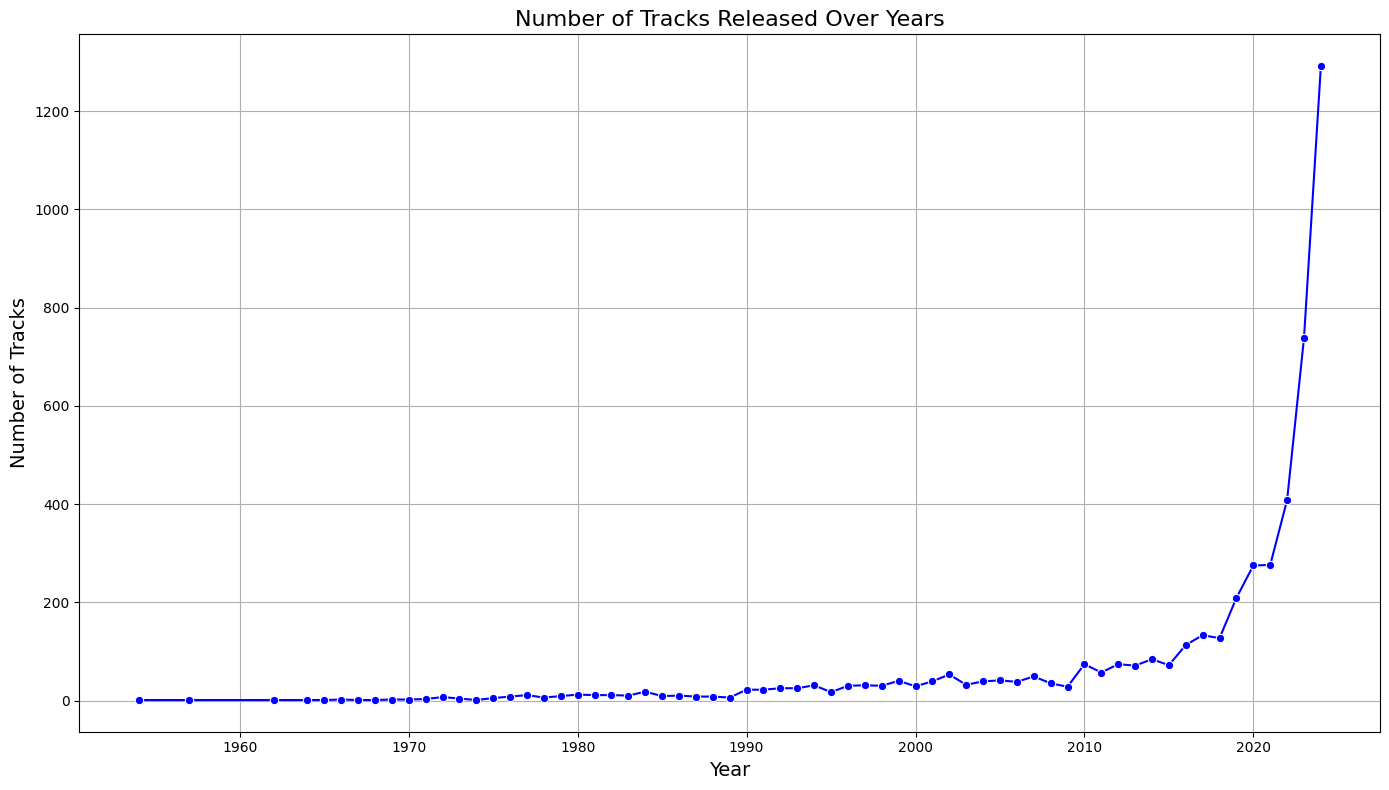

In [19]:
tracks_per_year = df_origin.groupby(
    'year').size().reset_index(name='track_count')


plt.figure(figsize=(14, 8))


sns.lineplot(data=tracks_per_year, x='year',
             y='track_count', marker='o', color='blue')


plt.title('Number of Tracks Released Over Years', fontsize=16)


plt.xlabel('Year', fontsize=14)


plt.ylabel('Number of Tracks', fontsize=14)


plt.grid(True)


plt.tight_layout()


plt.show()

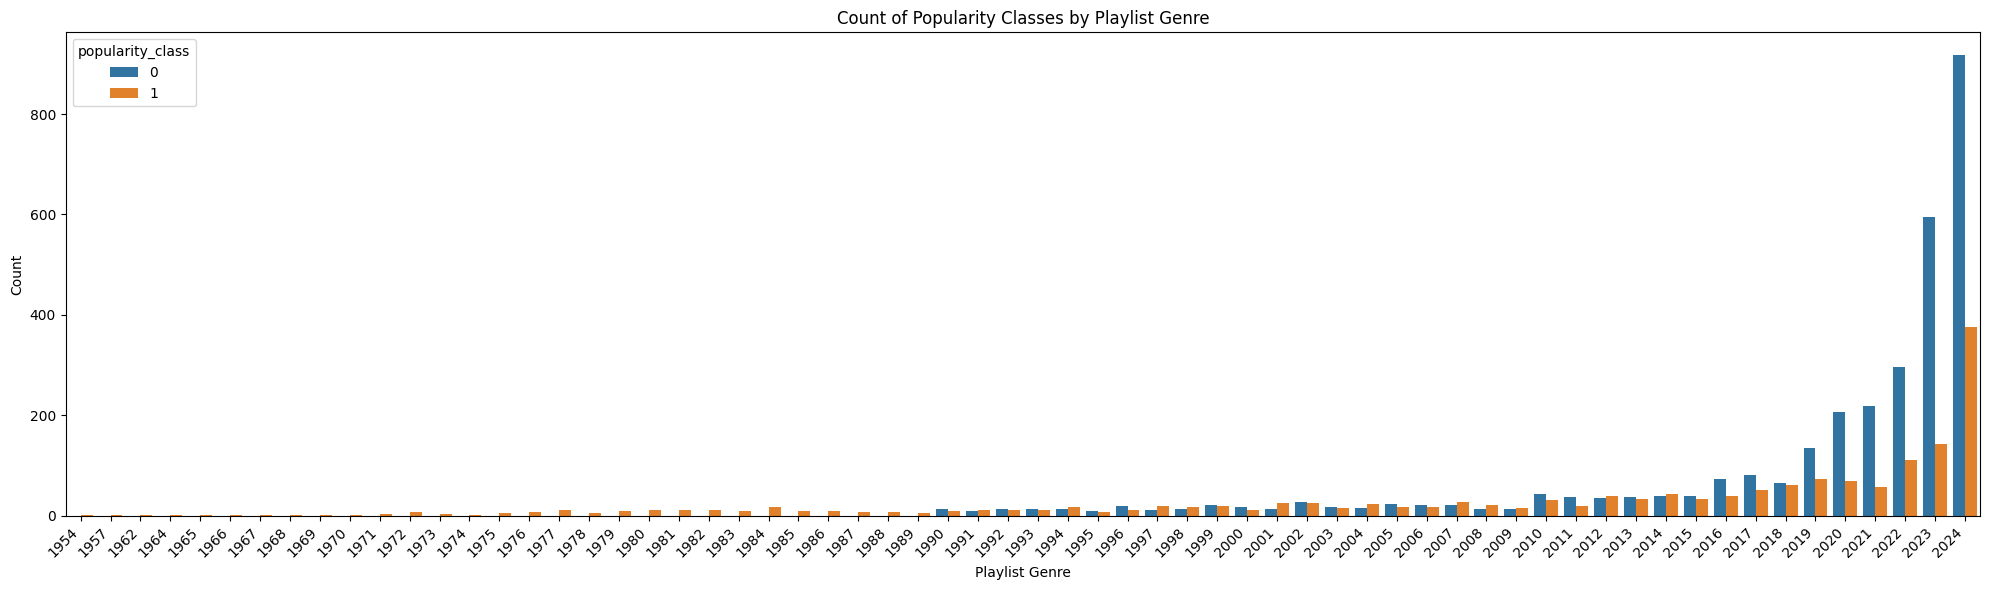

In [20]:
year_counts = df_origin.groupby(['year', 'popularity_class'])[
    'popularity_class'].count().reset_index(name='count')



plt.figure(figsize=(20, 6))


sns.barplot(x='year', y='count', hue='popularity_class', data=year_counts)


plt.title('Count of Popularity Classes by Playlist Genre')


plt.xlabel('Playlist Genre')


plt.ylabel('Count')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()


plt.show()

# Divisão dos Dados

In [21]:
validation_data = df[df['song_age'] == 0].sample(frac=0.2, random_state=101)
df = df.drop(validation_data.index)

In [22]:
df_test = df[df['song_age'] == 0].sample(frac=0.2, random_state=101)
df_train = df.drop(df_test.index)

In [23]:
X_train = df_train.drop('popularity_class', axis=1).reset_index(drop=True)
y_train = df_train['popularity_class'].reset_index(drop=True)

X_test = df_test.drop('popularity_class', axis=1).reset_index(drop=True)
y_test = df_test['popularity_class'].reset_index(drop=True)

# Teste de Modelos Default

In [24]:
def show_metrics(y_test, y_pred, model_name):
    precision = precision_score(y_test, y_pred)
    print(f'precision: {precision:.2f}')
    f1 = f1_score(y_test, y_pred)
    print(f'F1-score: {f1:.2f}')

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[
                "Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix {model_name}")
    plt.show()

precision: 0.00
F1-score: 0.00


d:\Vini\Aulas\RPAD\Projeto\RPAD\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


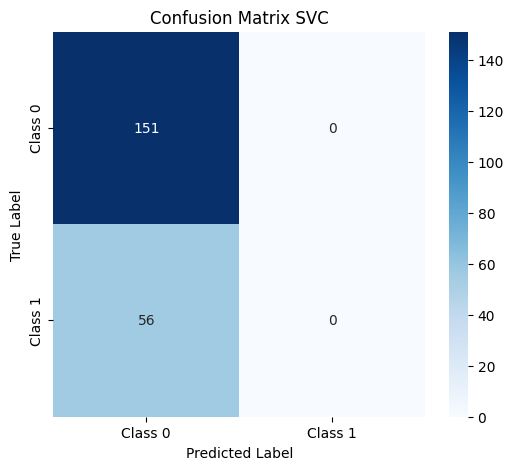

In [25]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
show_metrics(y_test, y_pred, "SVC")

precision: 0.57
F1-score: 0.59


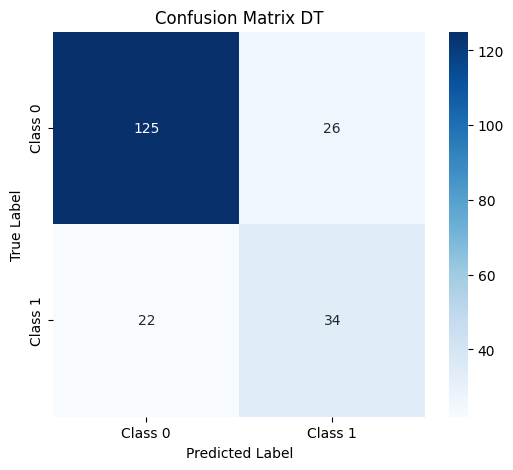

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=101)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
show_metrics(y_test, y_pred, "DT")

precision: 0.76
F1-score: 0.52


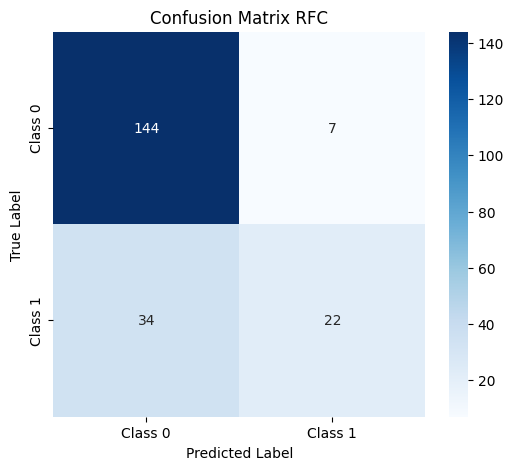

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
show_metrics(y_test, y_pred, "RFC")

precision: 0.71
F1-score: 0.39


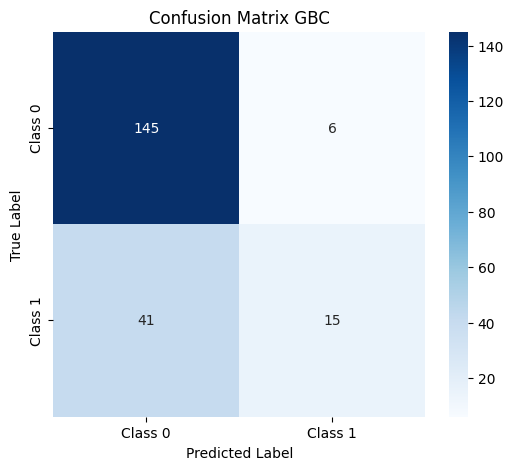

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=101)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
show_metrics(y_test, y_pred, "GBC")

precision: 0.65
F1-score: 0.57


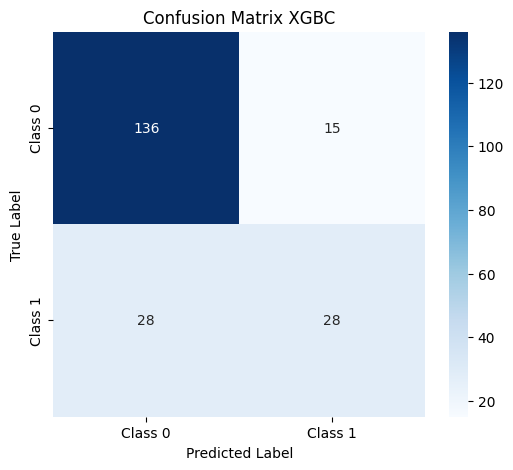

In [29]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=101)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
show_metrics(y_test, y_pred, "XGBC")

# Teste de modelos variando a "idade" do dataset

In [30]:
def plot_f1_age(ages, best_f1_score, best_f1_age, f1_scores, precisions):
    print(
        f'Age {best_f1_age} | Best F1-score: {best_f1_score:.2f}')

    plt.figure(figsize=(20, 8))
    plt.plot(ages, f1_scores, label='F1-score', marker='o', color='b')
    plt.xlabel('Age')
    plt.ylabel('F1-score')
    plt.title('F1-score Progression')

    plt.plot(ages, precisions, label='Precision', marker='o', color='g')
    plt.xlabel('Age')
    plt.ylabel('Precision')
    plt.title('Precision Progression')

    plt.xticks(np.arange(min(ages), max(ages) + 1, 1))
    plt.tight_layout()
    plt.legend()
    plt.show()

In [31]:
def train_model_age(model):
    f1_scores = []
    precisions = []
    ages = []

    best_f1_age = None
    best_f1_score = -np.inf

    for i in set(X_train['song_age']):
        X_train_age = X_train[X_train['song_age'] <= i]
        y_train_age = y_train[X_train['song_age'] <= i]

        model.fit(X_train_age, y_train_age)

        y_pred = model.predict(X_test)

        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        f1_scores.append(f1)
        precisions.append(precision)
        ages.append(i)

        if f1 > best_f1_score:
            best_f1_score = f1
            best_f1_age = i

    return ages, best_f1_score, best_f1_age, f1_scores, precisions

Age 8 | Best F1-score: 0.62


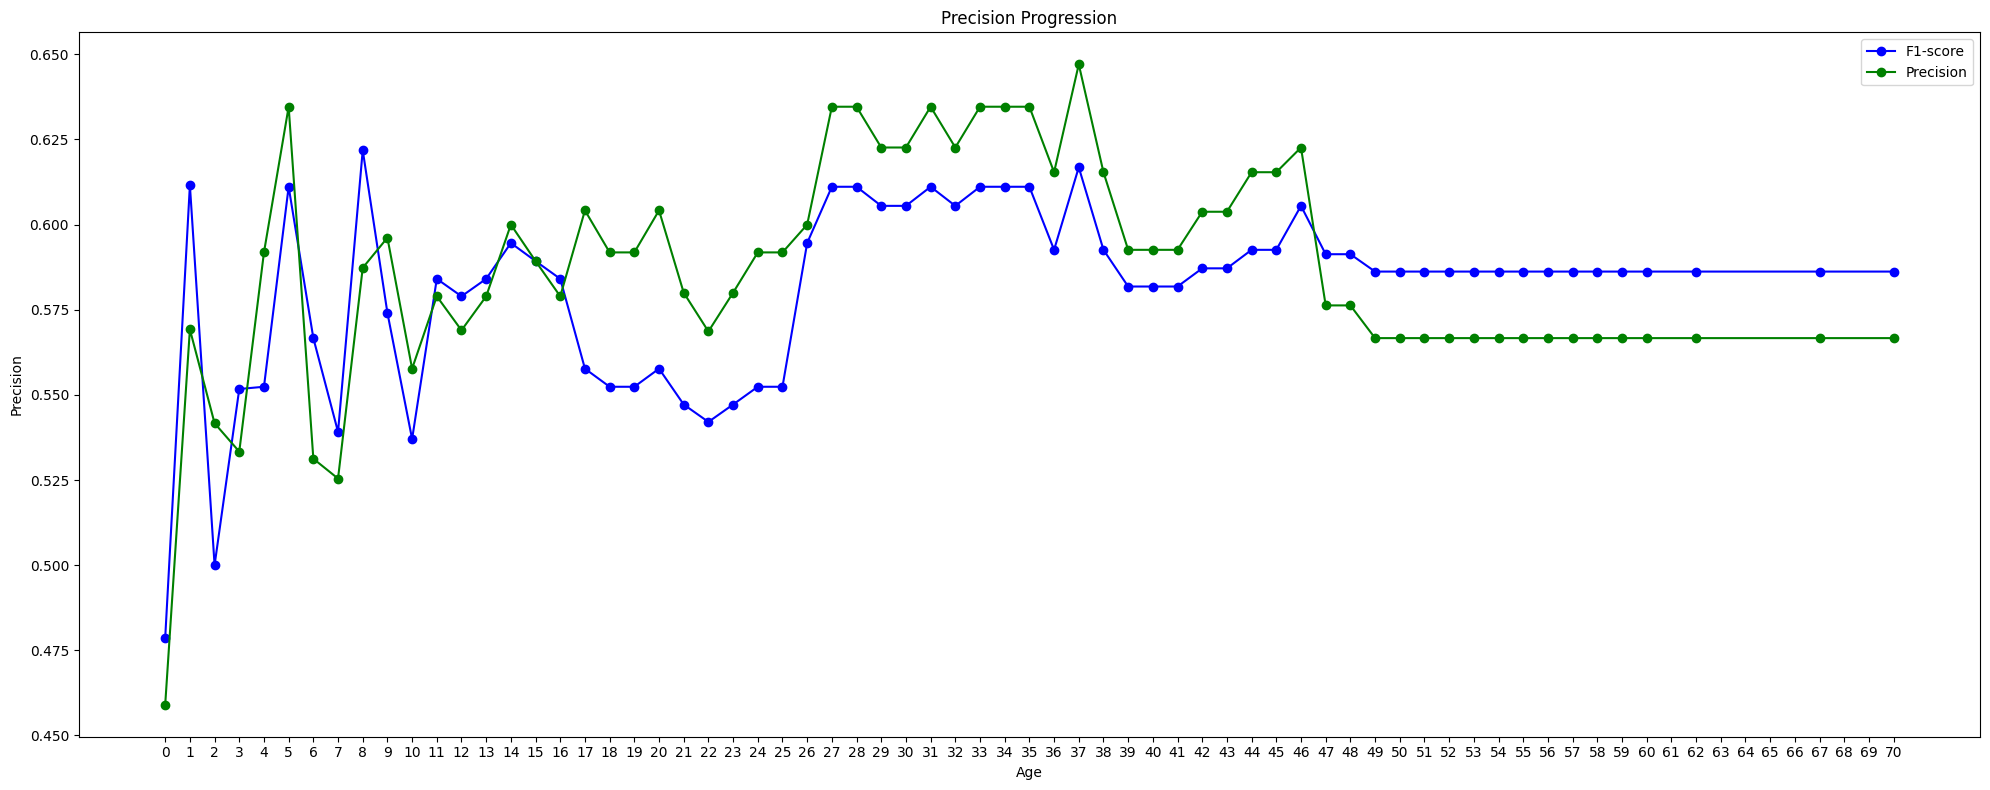

In [32]:
model = DecisionTreeClassifier(random_state=101)
ages, best_f1_score, best_f1_age, f1_scores, precisions = train_model_age(
    model)
plot_f1_age(ages, best_f1_score, best_f1_age, f1_scores, precisions)

Age 0 | Best F1-score: 0.63


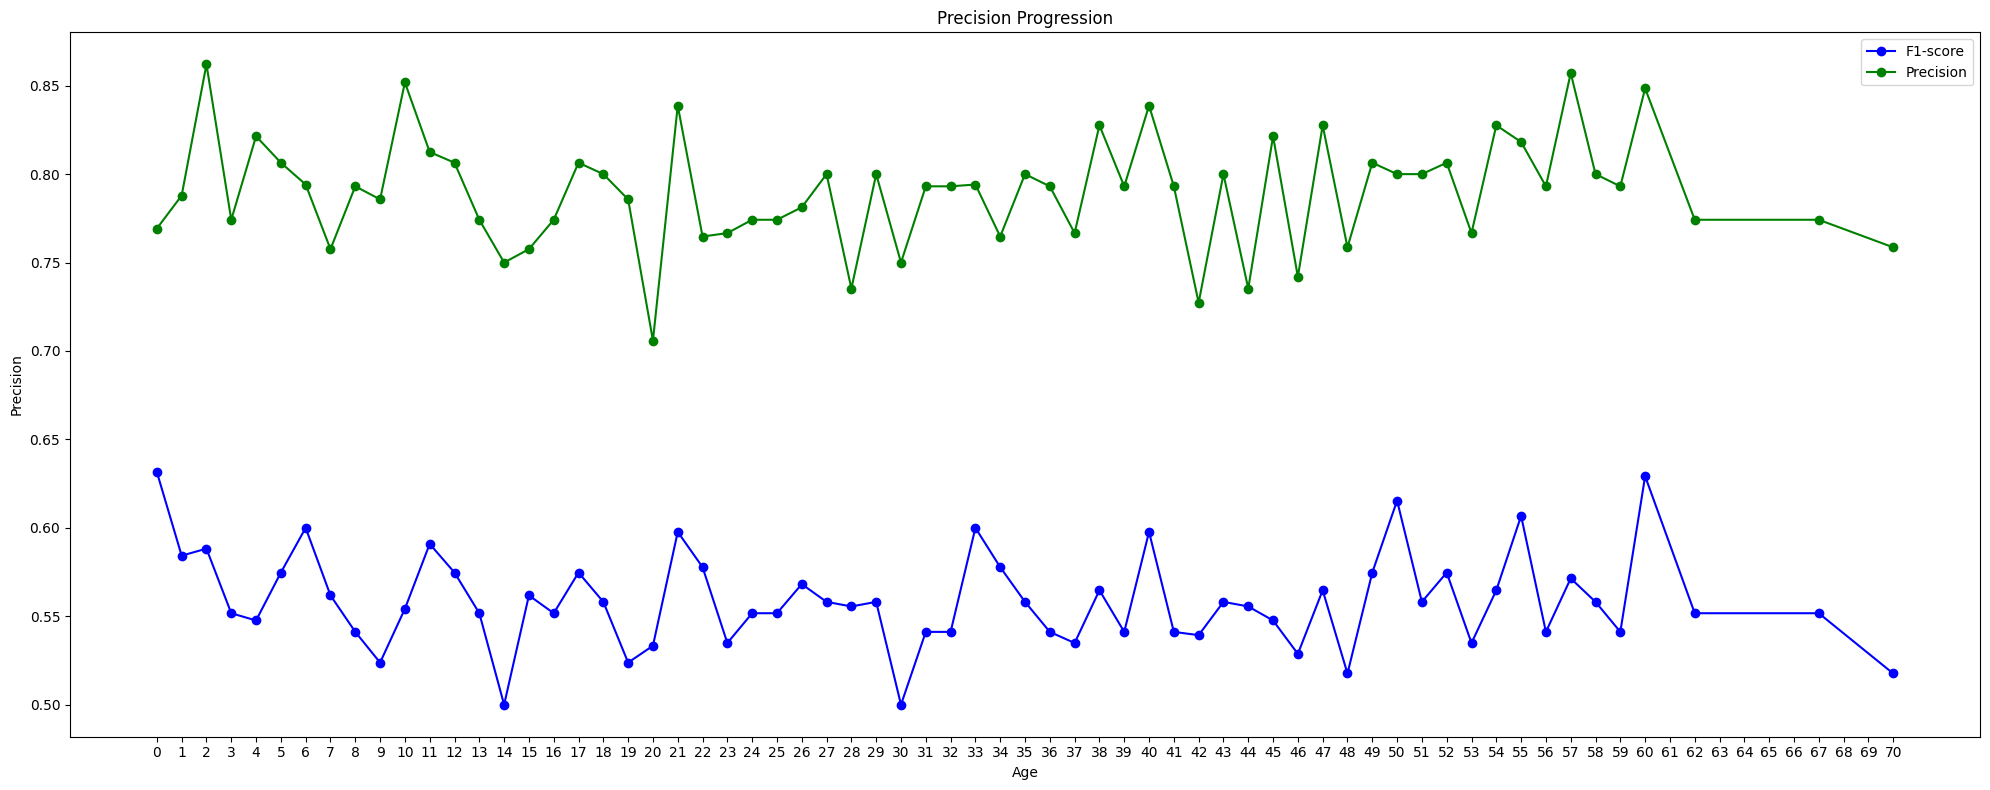

In [33]:
model = RandomForestClassifier(random_state=101)
ages, best_f1_score, best_f1_age, f1_scores, precisions = train_model_age(
    model)
plot_f1_age(ages, best_f1_score, best_f1_age, f1_scores, precisions)

Age 0 | Best F1-score: 0.67


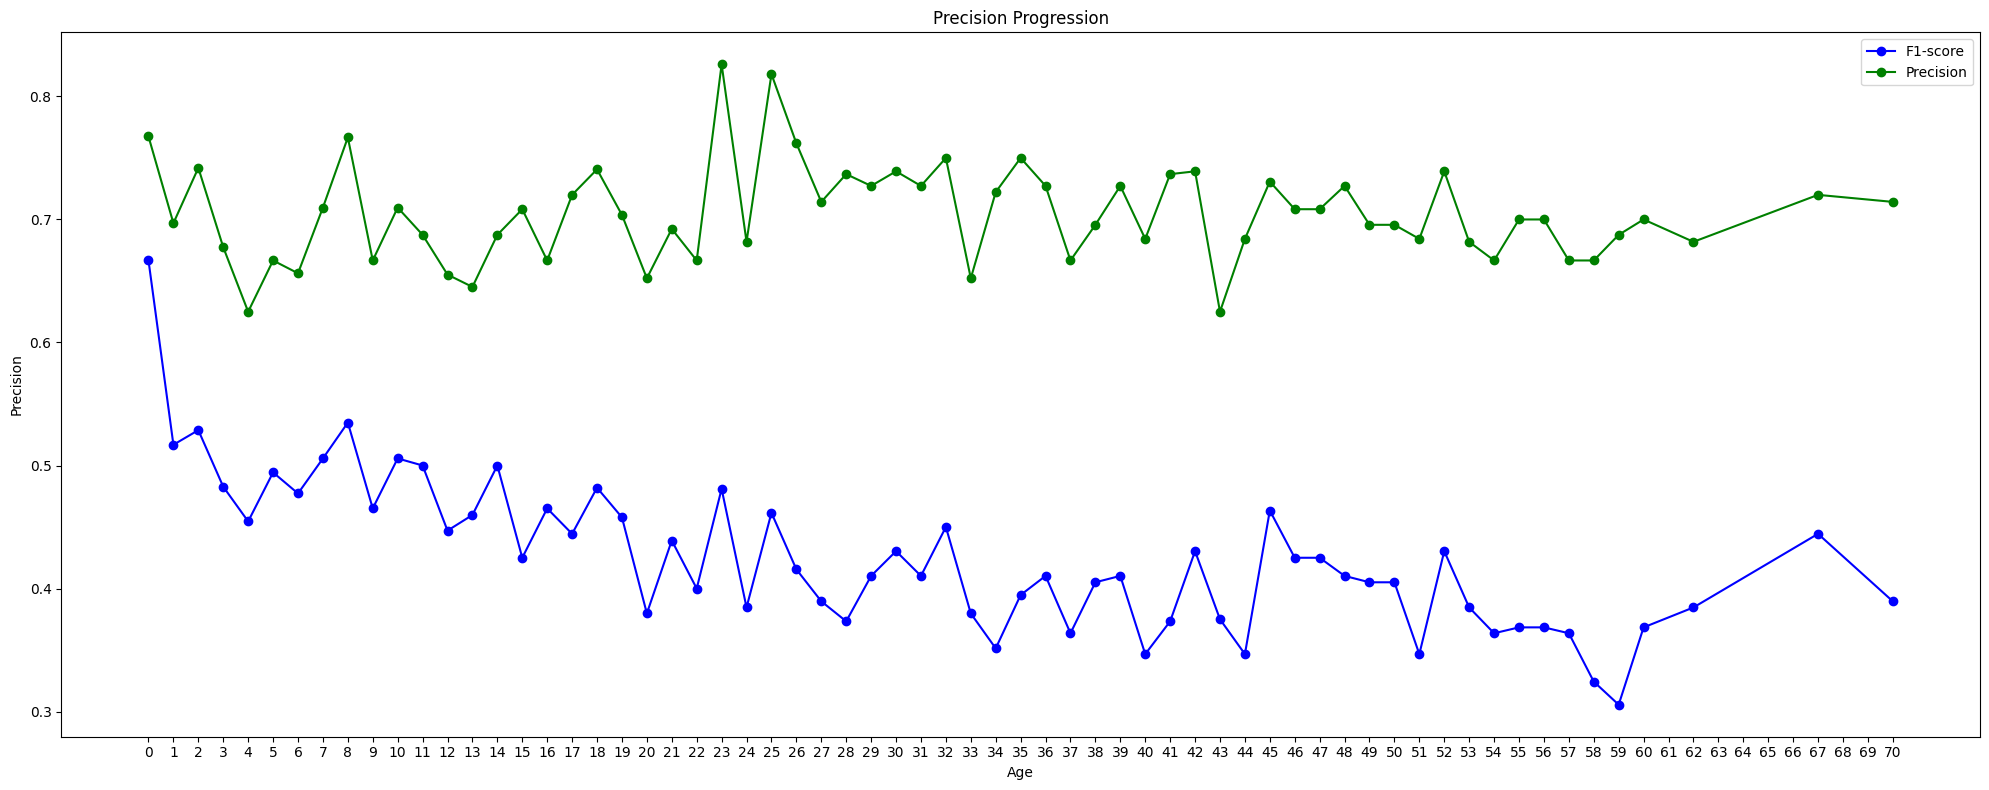

In [34]:
model = GradientBoostingClassifier(random_state=101)
ages, best_f1_score, best_f1_age, f1_scores, precisions = train_model_age(
    model)
plot_f1_age(ages, best_f1_score, best_f1_age, f1_scores, precisions)

Age 21 | Best F1-score: 0.65


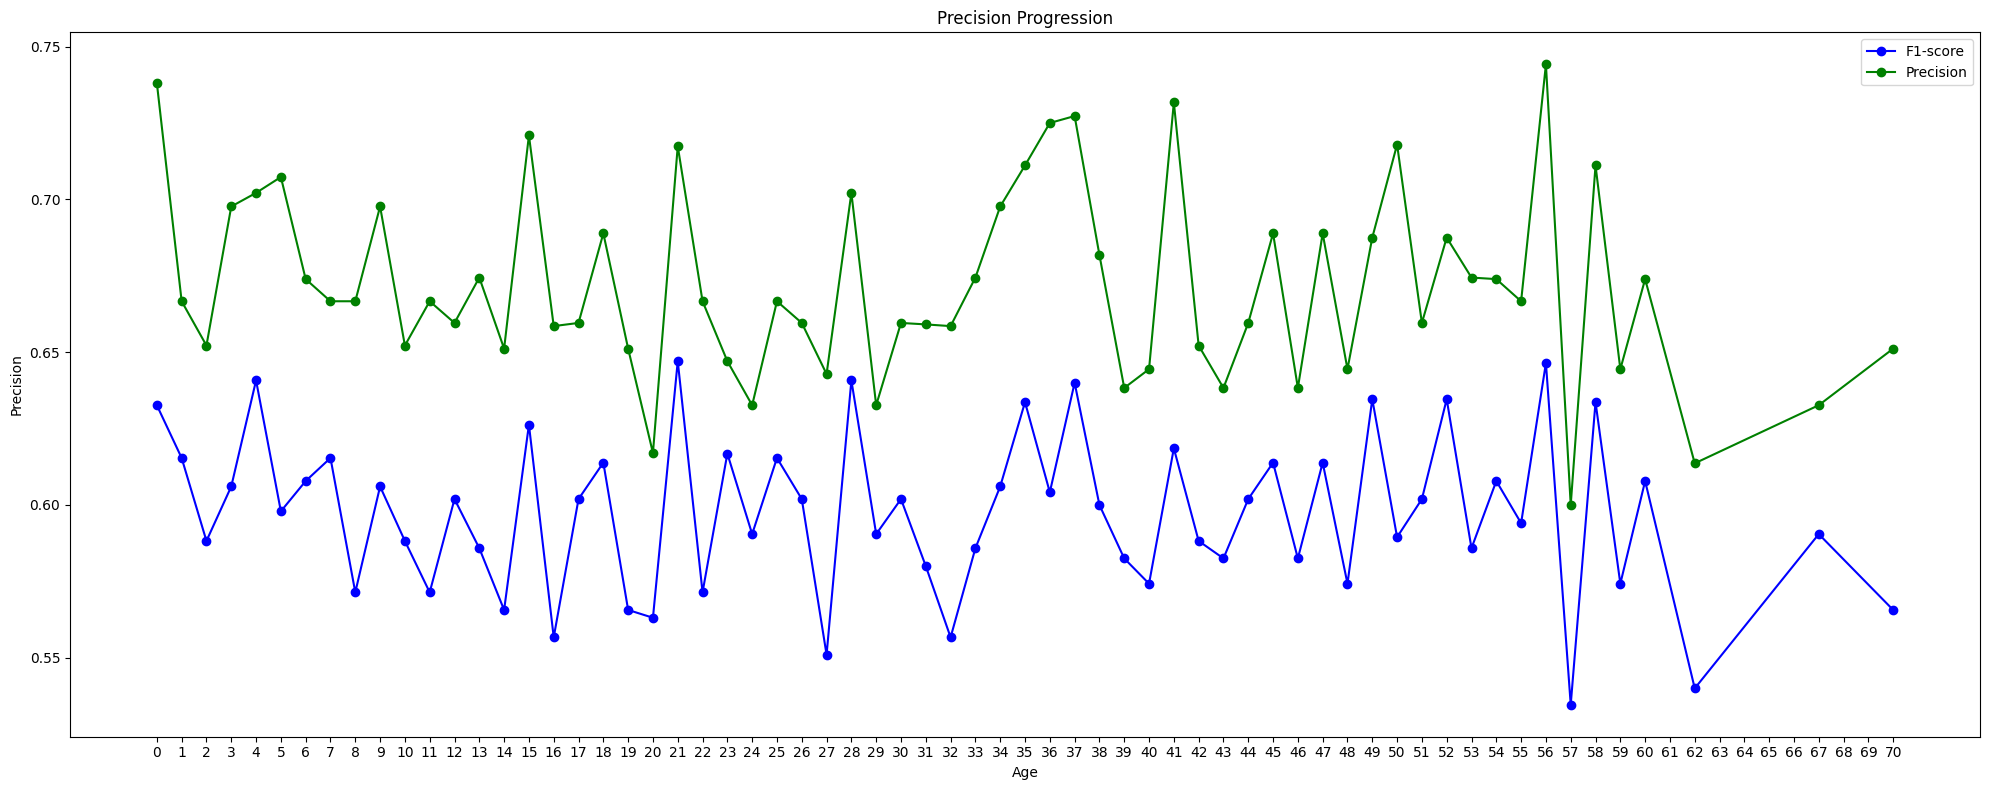

In [35]:
model = XGBClassifier(random_state=101)
ages, best_f1_score, best_f1_age, f1_scores, precisions = train_model_age(
    model)
plot_f1_age(ages, best_f1_score, best_f1_age, f1_scores, precisions)

# Otimização Baysiana XGBoost

In [36]:
def optmize_model(X_train, X_test, y_train, y_test, song_age= np.inf, n_trials = 30):
    def objective(trial):
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 500),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
            "gamma": trial.suggest_float("gamma", 0, 5),
            "reg_alpha": trial.suggest_float("reg_alpha", 1e-5, 1e-1, log=True),
            "reg_lambda": trial.suggest_float("reg_lambda", 1e-5, 1e-1, log=True),
            "tree_method": "hist",
            "device": "cuda",
            "random_state": 101,
        }

        X_train_age = X_train[X_train['song_age'] <= song_age]
        y_train_age = y_train[X_train['song_age'] <= song_age]

        model = XGBClassifier(**params)
        model.fit(X_train_age, y_train_age)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        # precision = precision_score(y_test, y_pred, , zero_division=1)

        return f1

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=n_trials)
    return study

In [38]:
max_age = 10

f1_scores = []
precisions = []
ages = []
params_list = []
studies = []

best_f1_age = None
best_f1_score = -np.inf
for i in set(X_train['song_age']):
    if i <= max_age:
        study = optmize_model(X_train, X_test, y_train, y_test, song_age=i, n_trials=60)
        studies.append(study)

        best_params = study.best_params
        params_list.append(best_params)

        best_model = xgb.XGBClassifier(**best_params)
        best_model.fit(X_train, y_train)

        y_pred = best_model.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        f1_scores.append(f1)
        precisions.append(precision)
        ages.append(i)

        if f1 > best_f1_score:
            best_f1_score = f1
            best_f1_age = i

In [39]:
params_df = pd.DataFrame(params_list)
params_df.describe()

n_estimators  max_depth  min_child_weight  learning_rate  subsample  \
count     11.000000       11.0         11.000000      11.000000  11.000000   
mean     331.727273        8.0          3.727273       0.095223   0.690536   
std      107.333211        2.0          2.453198       0.093333   0.125875   
min      133.000000        3.0          1.000000       0.014353   0.552699   
25%      268.500000        7.5          2.500000       0.034504   0.579694   
50%      331.000000        8.0          3.000000       0.045529   0.677528   
75%      420.000000        9.5          4.500000       0.148048   0.766080   
max      474.000000       10.0          9.000000       0.264448   0.934231   

       colsample_bytree      gamma  reg_alpha  reg_lambda  
count         11.000000  11.000000  11.000000   11.000000  
mean           0.835153   1.359141   0.015863    0.025161  
std            0.107376   0.545877   0.021898    0.038362  
min            0.653748   0.442316   0.000010    0.000030  
25%            0.769014   1.057920   0.000373    0.000138  
50%            0.856368   1.295026   0.008819    0.001074  
75%            0.921995   1.659488   0.022573    0.047826  
max            0.944255   2.312993   0.072615    0.096998

In [40]:
best_index = f1_scores.index(max(f1_scores)) 

print("age", ages[best_index])
print("param", params_list[best_index])
print("f1", f1_scores[best_index])
print("prec", precisions[best_index])

age 4
param {'n_estimators': 356, 'max_depth': 3, 'min_child_weight': 3, 'learning_rate': 0.25212173075565897, 'subsample': 0.5772594222347563, 'colsample_bytree': 0.8071756264735832, 'gamma': 1.198966877422633, 'reg_alpha': 1.0138347792590834e-05, 'reg_lambda': 0.0010735034420023561}
f1 0.6407766990291263
prec 0.7021276595744681


Age 4 | Best F1-score: 0.64


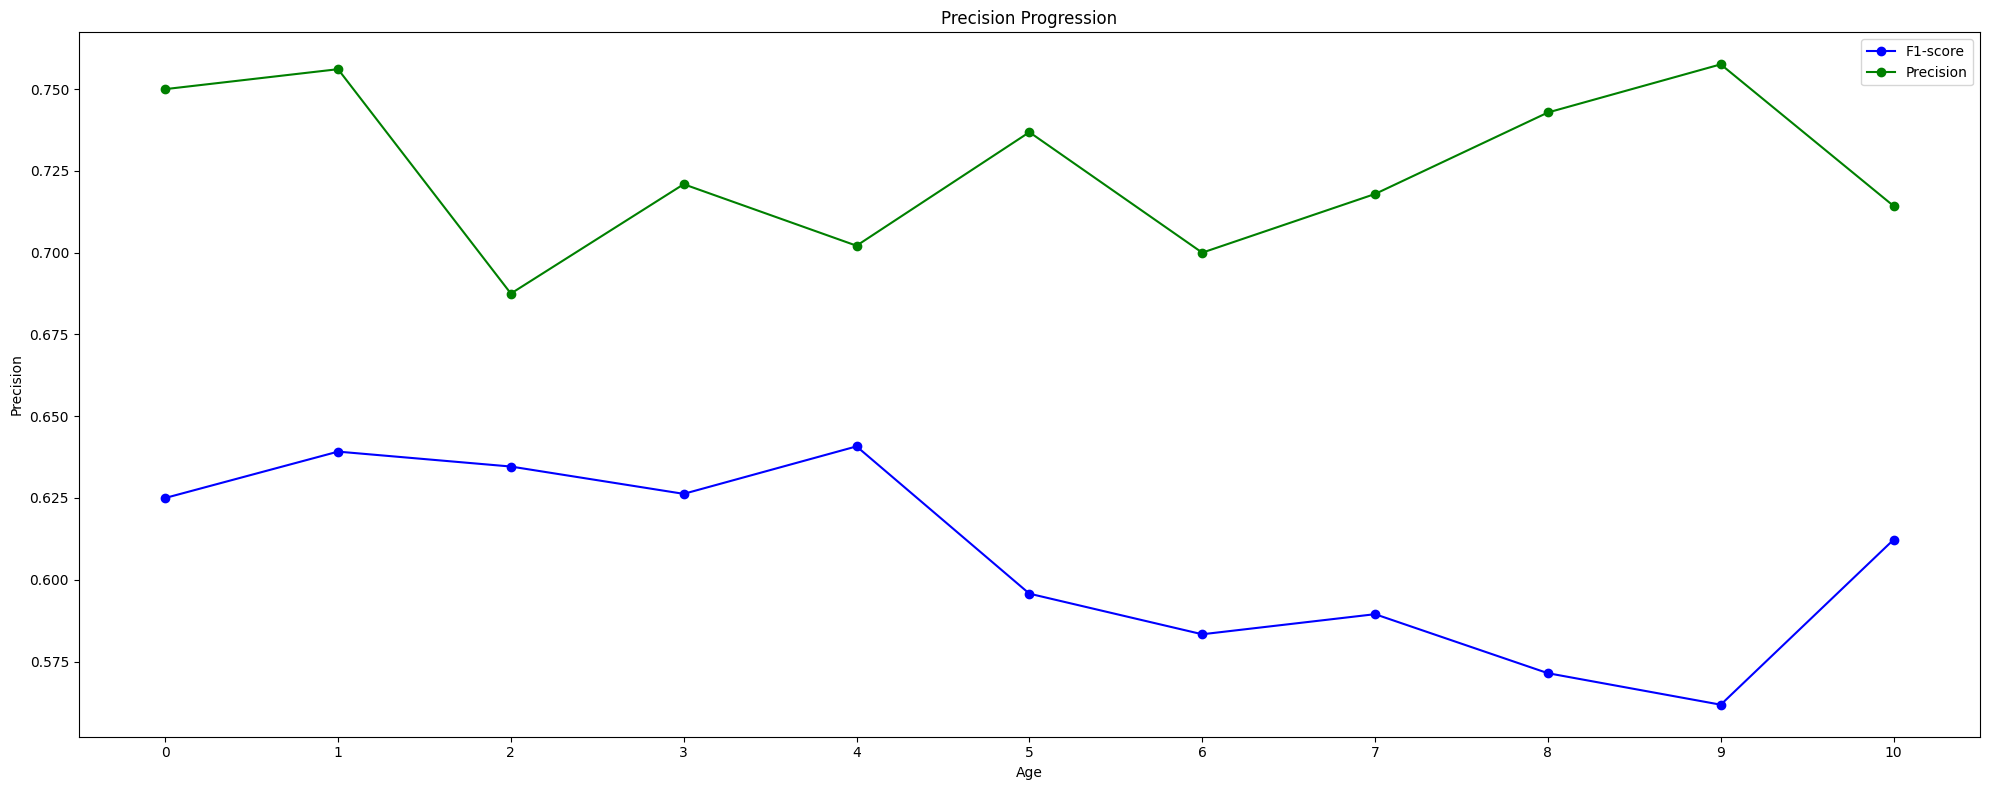

In [41]:
plot_f1_age(ages, best_f1_score, best_f1_age, f1_scores, precisions)

C:\Users\Vinícius\AppData\Local\Temp\ipykernel_25480\2560076766.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(best_study)


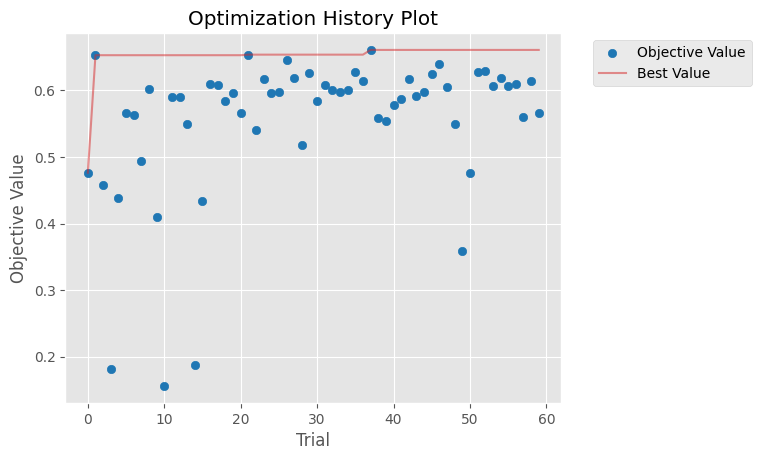

In [42]:
best_study = studies[best_index] 
optuna.visualization.matplotlib.plot_optimization_history(best_study)
plt.show()

primeiros parametros testados

Melhores Hiperparâmetros: {'n_estimators': 371, 'max_depth': 4, 'learning_rate': 0.04616496528578333, 'subsample': 0.6901182701021162, 'colsample_bytree': 0.6944752604179266, 'gamma': 0.6521292320229113, 'reg_alpha': 0.006443962710600032, 'reg_lambda': 0.0006654719771951671}


Melhores Hiperparâmetros: {'n_estimators': 467, 'max_depth': 5, 'learning_rate': 0.2908265368325626, 'subsample': 0.6563949484485725, 'colsample_bytree': 0.5302523127358224, 'gamma': 1.1684119475867139, 'reg_alpha': 0.0011210505802865004, 'reg_lambda': 2.2287272364491117e-05}
F1-score no Teste: 0.5057

Melhores Hiperparâmetros: {'n_estimators': 432, 'max_depth': 6, 'learning_rate': 0.08326420393425515, 'subsample': 0.6083405930649473, 'colsample_bytree': 0.6835229188262238, 'gamma': 0.7063951120979722, 'reg_alpha': 0.0009046688304223767, 'reg_lambda': 3.231105018890899e-05}
F1-score no Teste: 0.5000

Melhores Hiperparâmetros: {'n_estimators': 226, 'max_depth': 9, 'learning_rate': 0.045797808211164054, 'subsample': 0.7648409676514051, 'colsample_bytree': 0.7673157889560084, 'gamma': 0.7951810224514322, 'reg_alpha': 4.959619890574053e-05, 'reg_lambda': 0.022013041602255805}
F1-score no Teste: 0.5185

resultados variando idade

age 48
param {'n_estimators': 450, 'max_depth': 10, 'learning_rate': 0.19029419553854193, 'subsample': 0.5763701363746103, 'colsample_bytree': 0.5544585022046169, 'gamma': 1.822321260717692, 'reg_alpha': 0.008574242176530371, 'reg_lambda': 0.0007682565388837369}
f1 0.5454545454545454
acc 0.7575757575757576

opt 20min max age 70, 30 iter

age 21
param {'n_estimators': 341, 'max_depth': 9, 'learning_rate': 0.19504965865979004, 'subsample': 0.5259503097586223, 'colsample_bytree': 0.9902914838339043, 'gamma': 0.8392656565246837, 'reg_alpha': 0.0002950501329527545, 'reg_lambda': 0.004083719625729432}
f1 0.5681818181818182
acc 0.7696969696969697

opt 12min age 25, 50 iter

age 18
param {'n_estimators': 213, 'max_depth': 9, 'learning_rate': 0.1967901846712098, 'subsample': 0.5264105783976186, 'colsample_bytree': 0.5013941220888801, 'gamma': 0.5685098261757058, 'reg_alpha': 6.769634259980471e-05, 'reg_lambda': 0.00042497770867537456}
f1 0.5777777777777777
acc 0.7696969696969697

age 20
param {'n_estimators': 249, 'max_depth': 9, 'min_child_weight': 5, 'learning_rate': 0.04966421108391417, 'subsample': 0.7534174943390113, 'colsample_bytree': 0.7617632841584423, 'gamma': 1.4902988065230538, 'reg_alpha': 0.007329719381398565, 'reg_lambda': 0.001397286429048964}
f1 0.6601941747572816
prec 0.723404255319149

age 4
param {'n_estimators': 211, 'max_depth': 8, 'min_child_weight': 4, 'learning_rate': 0.15988389549095258, 'subsample': 0.7912537138797366, 'colsample_bytree': 0.6466187766766683, 'gamma': 0.31728003683916983, 'reg_alpha': 1.667302048864322e-05, 'reg_lambda': 0.009183789824158385}
f1 0.660377358490566
prec 0.7

max age 10

age 4
param {'n_estimators': 356, 'max_depth': 3, 'min_child_weight': 3, 'learning_rate': 0.25212173075565897, 'subsample': 0.5772594222347563, 'colsample_bytree': 0.8071756264735832, 'gamma': 1.198966877422633, 'reg_alpha': 1.0138347792590834e-05, 'reg_lambda': 0.0010735034420023561}
f1 0.6407766990291263
prec 0.7021276595744681

# Conjunto separado de validação

In [43]:
validation_data

energy    tempo  danceability  loudness  liveness  valence  speechiness  \
2982  0.7290  124.011         0.555    -9.798    0.1170   0.1570       0.0335   
3692  0.9370  114.996         0.561    -5.051    0.3840   0.6070       0.0472   
3376  0.5200  111.036         0.951    -6.919    0.0550   0.6680       0.2400   
1841  0.6810   96.006         0.642    -5.426    0.0756   0.5300       0.0259   
21    0.7600  103.969         0.701    -5.478    0.1850   0.6900       0.0285   
...      ...      ...           ...       ...       ...      ...          ...   
3222  0.8690  110.052         0.761    -3.899    0.0800   0.4940       0.0815   
2627  0.7370   81.022         0.736    -5.819    0.0784   0.5040       0.0462   
3627  0.0398  126.947         0.166   -31.035    0.1000   0.0365       0.0468   
2785  0.3280   79.008         0.748   -10.095    0.1070   0.3820       0.2320   
4484  0.1320  132.338         0.208   -21.318    0.1160   0.0916       0.0389   

      instrumentalness  mode  duration_ms  ...  key_7.0  key_8.0  key_9.0  \
2982          0.867000   1.0     290323.0  ...        0        0        0   
3692          0.812000   1.0     178041.0  ...        1        0        0   
3376          0.001710   1.0     164707.0  ...        1        0        0   
1841          0.533000   1.0     187433.0  ...        0        0        0   
21            0.000065   1.0     175459.0  ...        0        0        0   
...                ...   ...          ...  ...      ...      ...      ...   
3222          0.005440   0.0     138068.0  ...        1        0        0   
2627          0.000000   0.0     168889.0  ...        0        0        0   
3627          0.974000   1.0     175000.0  ...        0        0        0   
2785          0.923000   0.0     109367.0  ...        0        0        0   
4484          0.913000   1.0     192000.0  ...        0        0        0   

      key_10.0  key_11.0  time_signature_1.0  time_signature_3.0  \
2982         1         0                   0                   0   
3692         0         0                   0                   0   
3376         0         0                   0                   0   
1841         0         0                   0                   0   
21           0         0                   0                   0   
...        ...       ...                 ...                 ...   
3222         0         0                   0                   0   
2627         0         1                   0                   0   
3627         0         0                   0                   0   
2785         0         0                   0                   0   
4484         0         0                   0                   0   

      time_signature_4.0  time_signature_5.0  song_age  
2982                   1                   0         0  
3692                   1                   0         0  
3376                   1                   0         0  
1841                   1                   0         0  
21                     1                   0         0  
...                  ...                 ...       ...  
3222                   1                   0         0  
2627                   1                   0         0  
3627                   0                   1         0  
2785                   1                   0         0  
4484                   0                   1         0  

[258 rows x 30 columns]

In [44]:
X_val_data = validation_data.drop('popularity_class', axis=1).reset_index(drop=True)
y_val_data = validation_data['popularity_class'].reset_index(drop=True)

precision: 0.72
F1-score: 0.64


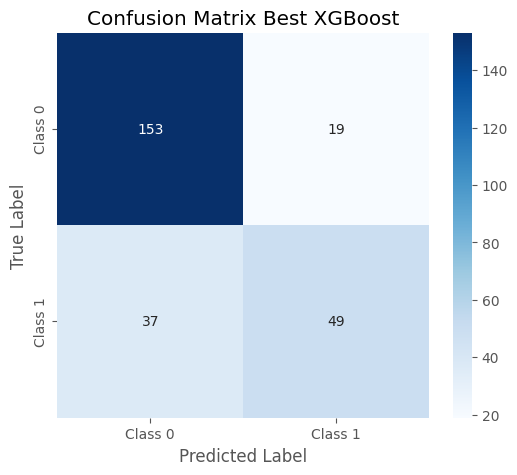

In [45]:
y_pred = best_model.predict(X_val_data)

show_metrics(y_val_data, y_pred, "Best XGBoost")

# Export .pkl

In [60]:
model_path = os.path.join("pickle", "best_model.pkl")
with open(model_path, "wb") as f:
    pickle.dump(best_model, f)
print("Model saved successfully!")

Model saved successfully!


In [61]:
model_path = os.path.join("pickle", "best_x_train.pkl")
with open(model_path, "wb") as f:
    pickle.dump(X_train[X_train['song_age'] <= 4], f)
print("Model saved successfully!")

Model saved successfully!


In [62]:
model_path = os.path.join("pickle", "X_val_data.pkl")
with open(model_path, "wb") as f:
    pickle.dump(X_val_data, f)
print("Model saved successfully!")

model_path = os.path.join("pickle", "y_val_data.pkl")
with open(model_path, "wb") as f:
    pickle.dump(y_val_data, f)
print("Model saved successfully!")

Model saved successfully!
Model saved successfully!
